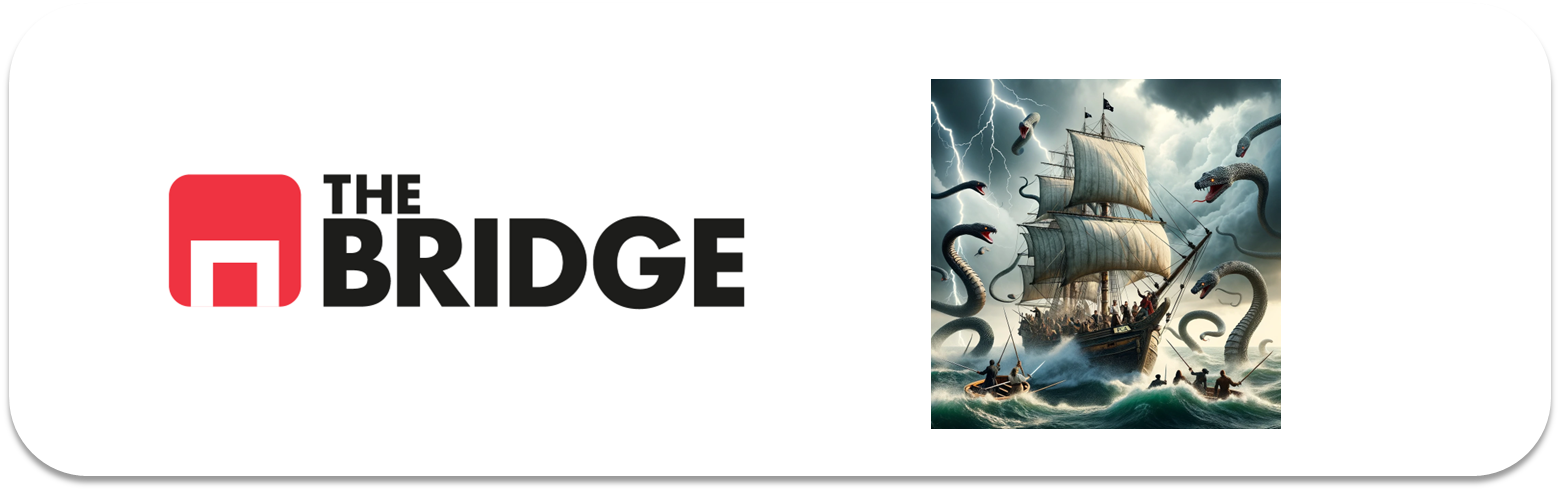

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [68]:
import bootcampviztools as bt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE # nos importamos las clase del feature seleccion.
from sklearn.feature_selection import SequentialFeatureSelector


In [4]:
df_previo=pd.read_csv('.\data\credit_npo.csv')

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

In [5]:
df_previo

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [6]:
# Veamos las columnas con nulos.
df_previo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [7]:
# Quitamos los nulos.
df=df_previo.dropna()

In [8]:
# Veamos si hemos quitado los nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [9]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000
mean,0.070244,0.335668,51.447698,0.340471,0.499708,6864.815420,8.759140,0.180010,1.059580,0.149712,0.856804
std,0.255568,0.365209,14.516270,2.927409,2.696067,11855.905437,5.129772,2.892577,1.140716,2.868248,1.147509
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034927,41.000000,0.000000,0.143456,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.179183,51.000000,0.000000,0.294748,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.587187,62.000000,0.000000,0.477414,8300.000000,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,6.000000,101.000000,98.000000,96.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [10]:
unique_counts = df.nunique()
print(unique_counts)

SeriousDlqin2yrs                            2
RevolvingUtilizationOfUnsecuredLines    10314
age                                        78
NumberOfTime30-59DaysPastDueNotWorse       10
DebtRatio                               11472
MonthlyIncome                            4167
NumberOfOpenCreditLinesAndLoans            43
NumberOfTimes90DaysLate                    13
NumberRealEstateLoansOrLines               16
NumberOfTime60-89DaysPastDueNotWorse        8
NumberOfDependents                         10
dtype: int64


In [11]:
# Veamos los valores que toman las features.
columns = df.columns.to_list()
for col in columns:
    unique_values = df[col].unique()
    numeric = pd.api.types.is_numeric_dtype(df[col])
    print(f"{col} ({df[col].dtype})")
    
    if numeric:
        unique_values = np.sort(unique_values)
        
    if numeric and len(unique_values) > 20:
        print(unique_values[:10], " ... ", unique_values[-10:])
    else:
        print(unique_values)
        
    print("\n")

SeriousDlqin2yrs (int64)
[0 1]


RevolvingUtilizationOfUnsecuredLines (float64)
[0.00e+00 9.93e-06 1.25e-05 1.43e-05 2.13e-05 3.25e-05 3.36e-05 4.35e-05
 6.48e-05 7.92e-05]  ...  [1.95681063 2.12472838 2.23960067 2.36398224 2.64179105 2.79905024
 2.87562189 3.12624585 5.34765235 6.        ]


age (int64)
[21 22 23 24 25 26 27 28 29 30]  ...  [ 89  90  91  92  93  94  95  96  97 101]


NumberOfTime30-59DaysPastDueNotWorse (int64)
[ 0  1  2  3  4  5  6  7  8 98]


DebtRatio (float64)
[0.00000e+00 2.60000e-05 3.93000e-05 6.62000e-05 9.15000e-05 9.91000e-05
 1.01698e-04 1.26040e-04 1.35117e-04 1.37912e-04]  ...  [57.  58.  59.  69.  75.  78.  79.  91.5 93.  96. ]


MonthlyIncome (float64)
[  0.   1.  50. 100. 135. 150. 200. 249. 250. 254.]  ...  [128000. 150000. 166666. 203500. 237490. 251608. 287662. 304000. 629000.
 702500.]


NumberOfOpenCreditLinesAndLoans (int64)
[0 1 2 3 4 5 6 7 8 9]  ...  [33 34 35 36 38 40 41 43 48 49]


NumberOfTimes90DaysLate (int64)
[ 0  1  2  3  4  5  6  7  8  

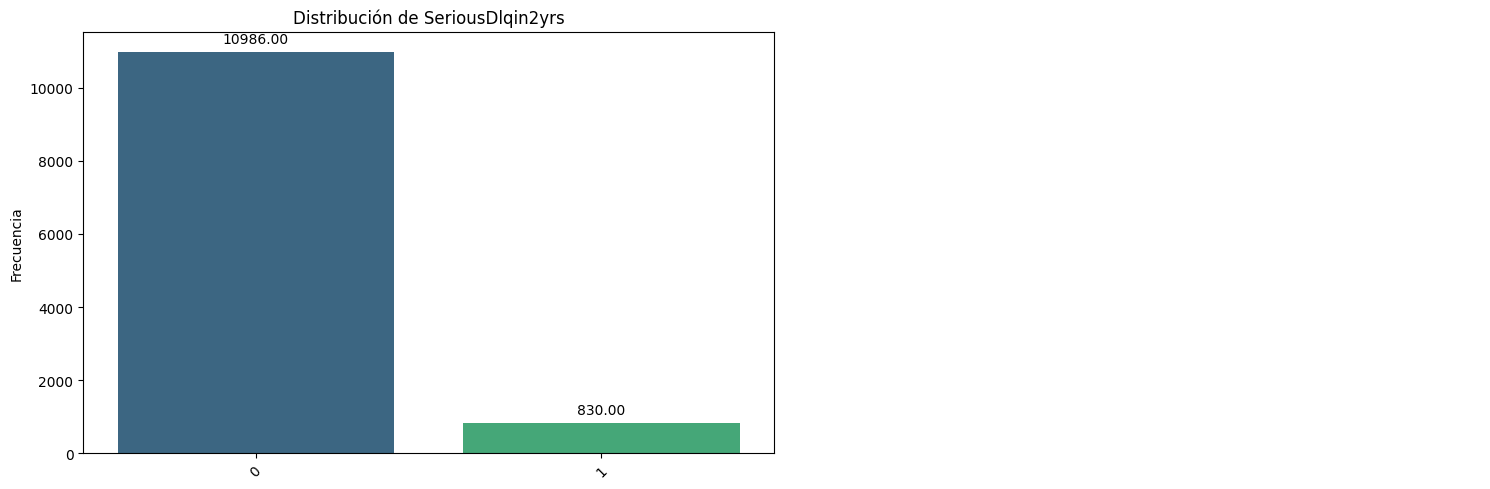

In [12]:
target = "SeriousDlqin2yrs"  


bt.pinta_distribucion_categoricas(df,[target], mostrar_valores= True)

In [13]:
# Vemos que el target está muy desbalanceado. 

In [14]:
# Vamos a transformar estas variables de numéricas a categóricas.
'''
 1. NumberOfTime30-59DaysPastDueNotWorse (int64) [ 0  1  2  3  4  5  6  7  8 98]
 2. NumberOfTimes90DaysLate (int64) [ 0  1  2  3  4  5  6  7  8  9 10 13 98]
 3. NumberOfTime60-89DaysPastDueNotWorse (int64) [ 0  1  2  3  4  5 11 98]
 '''

'\n 1. NumberOfTime30-59DaysPastDueNotWorse (int64) [ 0  1  2  3  4  5  6  7  8 98]\n 2. NumberOfTimes90DaysLate (int64) [ 0  1  2  3  4  5  6  7  8  9 10 13 98]\n 3. NumberOfTime60-89DaysPastDueNotWorse (int64) [ 0  1  2  3  4  5 11 98]\n '

In [15]:
df_2=df.copy()
# Hacemos copia por si acaso. Vamos a hacer los cambios sobre todo el dataset antes de dividir entre train y test.

In [16]:
# Vamos a ver el valuecounts de las variables que vamos a modificar para que aporte información.
df_2['NumberOfTime30-59DaysPastDueNotWorse'].value_counts(sort=True)

NumberOfTime30-59DaysPastDueNotWorse
0     9818
1     1354
2      397
3      127
4       64
5       23
6       20
98      10
8        2
7        1
Name: count, dtype: int64

In [17]:
df_2['NumberOfTimes90DaysLate'].value_counts(sort=True)

NumberOfTimes90DaysLate
0     11156
1       394
2       142
3        54
4        31
5        14
98       10
6         6
8         3
7         3
10        1
9         1
13        1
Name: count, dtype: int64

In [18]:
df_2['NumberOfTime60-89DaysPastDueNotWorse'].value_counts(sort=True)

NumberOfTime60-89DaysPastDueNotWorse
0     11206
1       478
2        85
3        18
4        14
98       10
5         4
11        1
Name: count, dtype: int64

In [19]:
# Vemos que con dos categorías sería suficiente, como si fuera booleana, para las dos últimas y tres para la primera.

In [20]:
# PVamos a transformar algunas numéricas discretas en categóricas.
bins= [0, 1, 100]  # Definir los límites de los intervalos
labels = ['0','1']  # Etiquetas para las categorías


In [21]:
df_2['NOT30_59DPDNW_Cat'] = pd.cut(df_2['NumberOfTime30-59DaysPastDueNotWorse'], bins=bins, labels=labels, right=False)
df_2['NOT90DaysLate_Cat'] = pd.cut(df_2['NumberOfTimes90DaysLate'], bins=bins, labels=labels, right=False)
df_2['NOT60_89PDNW_Cat'] = pd.cut(df_2['NumberOfTime60-89DaysPastDueNotWorse'], bins=bins, labels=labels, right=False)
df_2.head()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,NOT30_59DPDNW_Cat,NOT90DaysLate_Cat,NOT60_89PDNW_Cat
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0,0,1,0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0,0,0,0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0,0,0,0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0,0,0,0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0,0,0,0


In [22]:
df_2=df_2.drop(columns=['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse'])
df_2.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,NOT30_59DPDNW_Cat,NOT90DaysLate_Cat,NOT60_89PDNW_Cat
0,0,0.081892,37,0.070709,5656.0,12,0,0.0,0,1,0
1,0,0.023413,74,0.209197,4870.0,9,1,0.0,0,0,0
2,0,0.000000,43,0.080784,5000.0,2,0,2.0,0,0,0
3,0,0.492754,44,0.412735,7333.0,4,2,3.0,0,0,0
4,0,1.000000,63,0.000000,8333.0,3,0,1.0,0,0,0


  1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
  

In [23]:
# Primero dividimos en train y en test.
train_set, test_set = train_test_split(df_2, test_size= 0.2, random_state= 42)

In [24]:
print(len(train_set))
print(len(test_set))


9452
2364


2.1. ANÁLISIS VISUAL

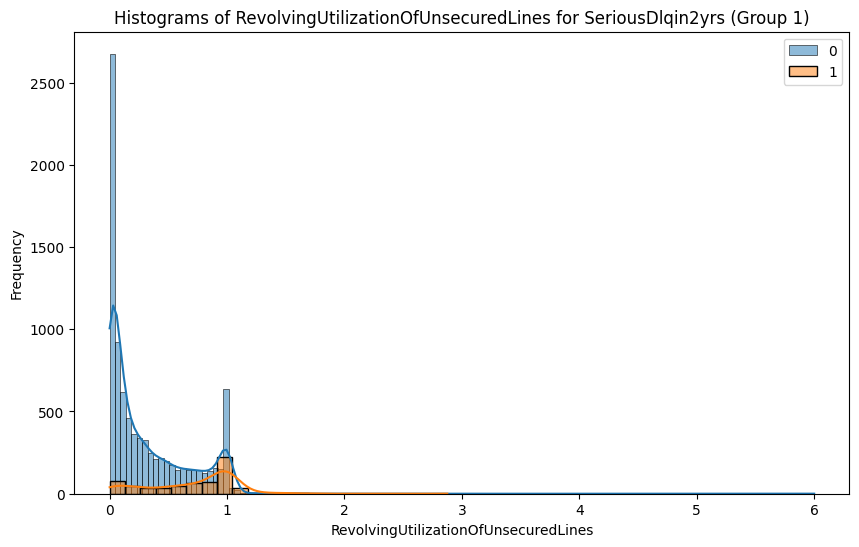

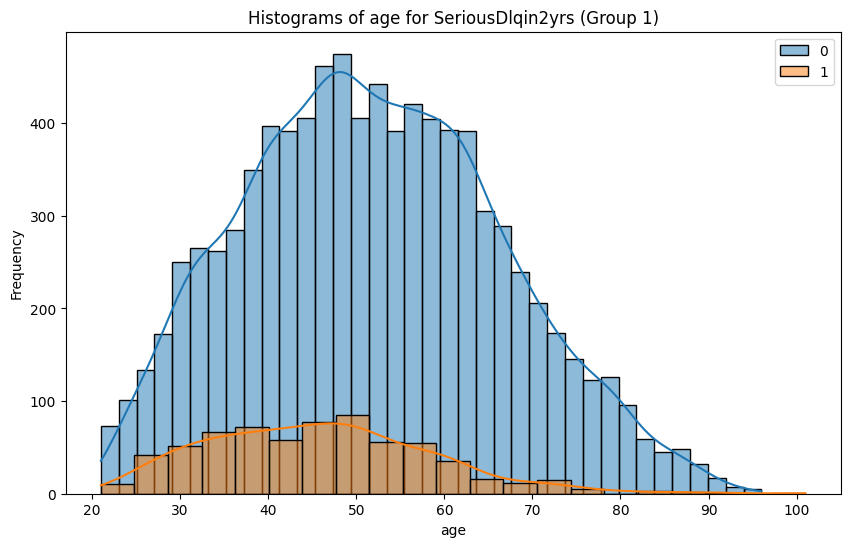

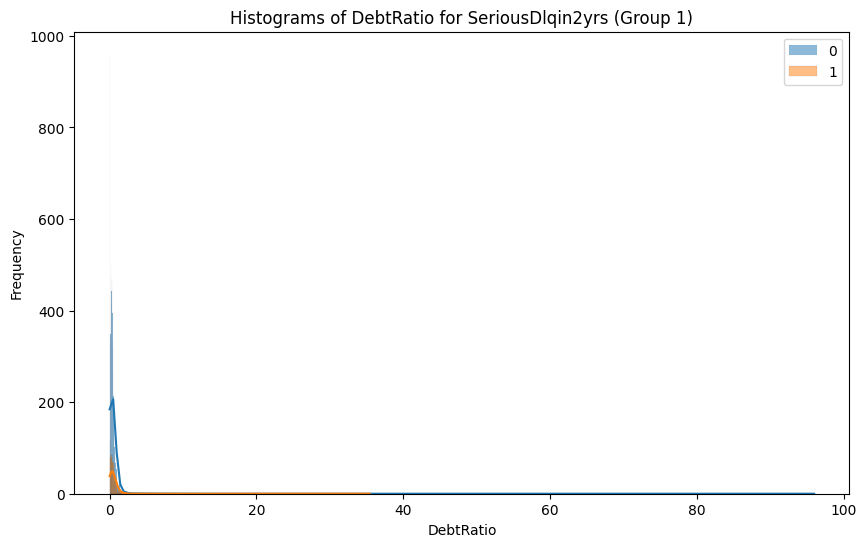

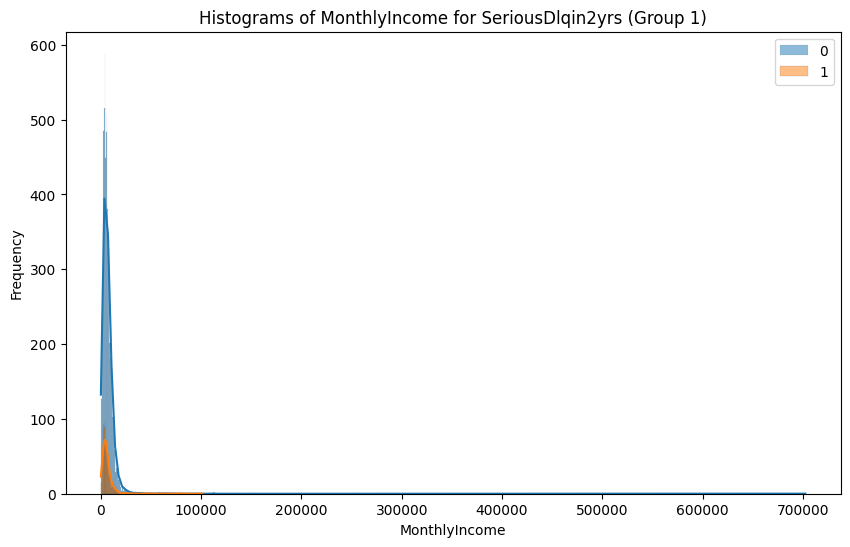

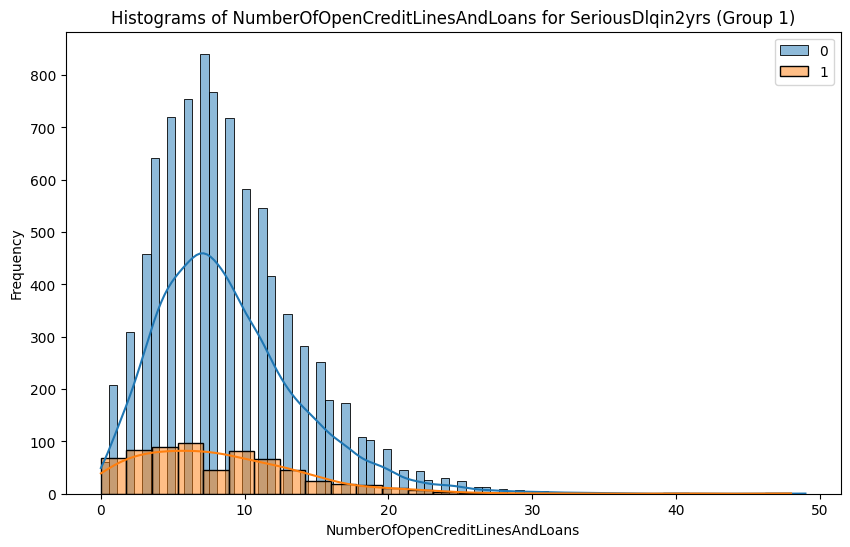

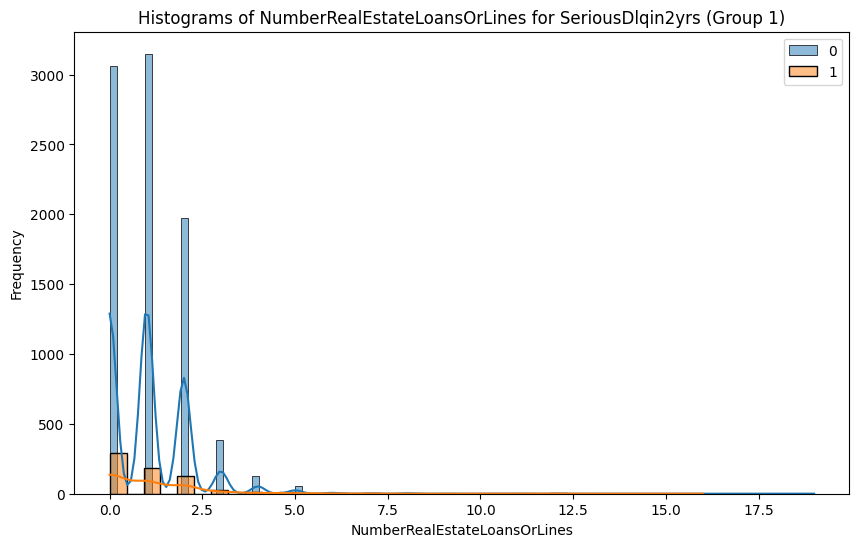

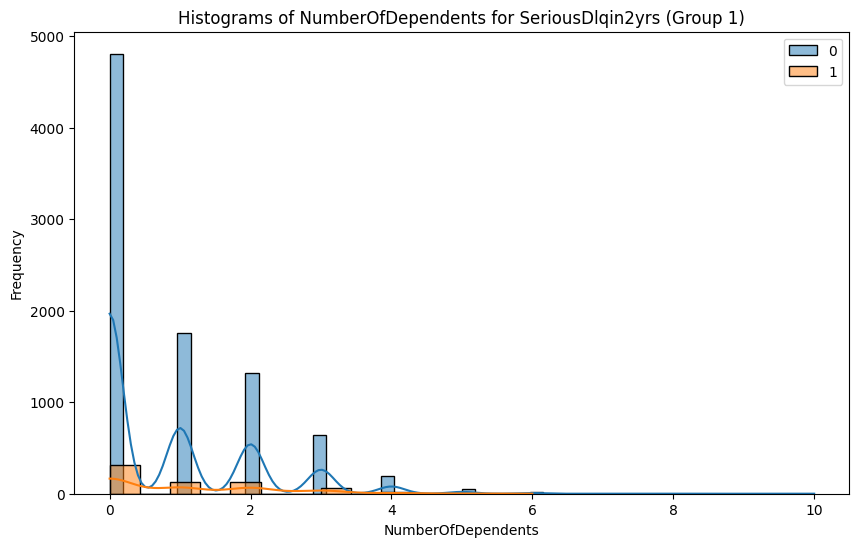

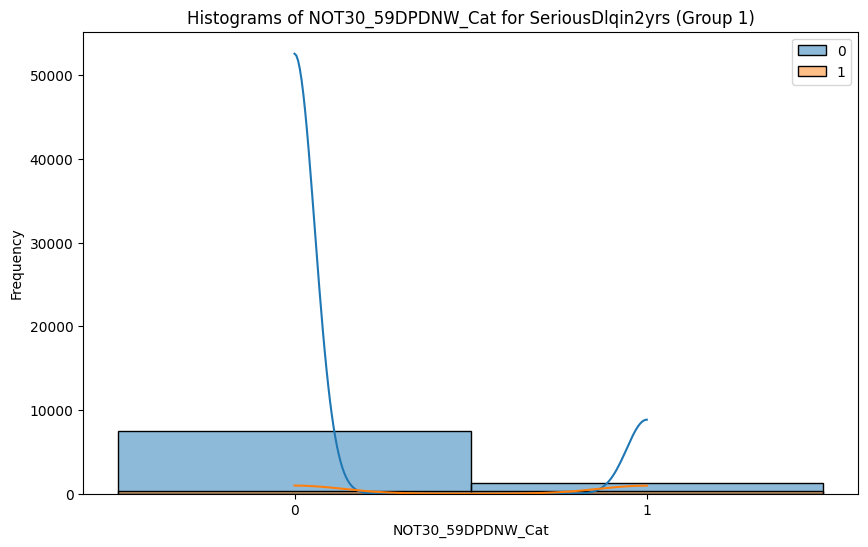

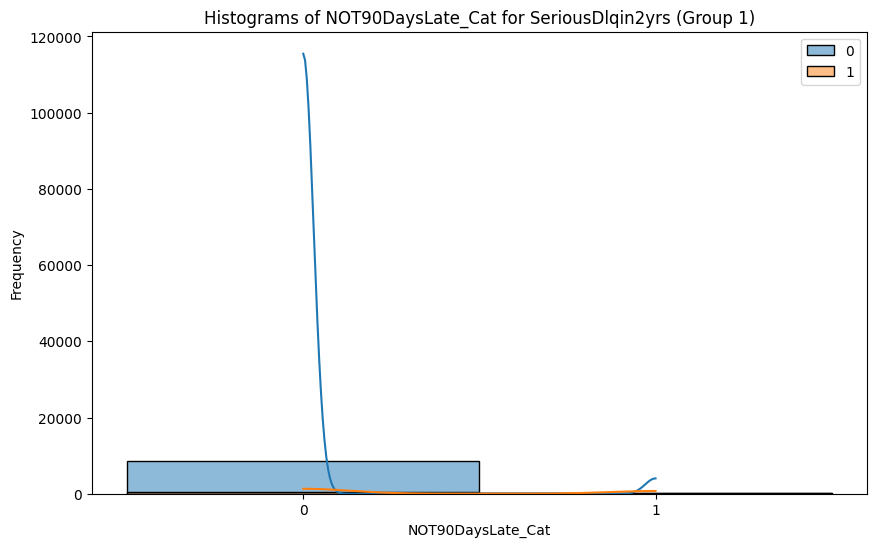

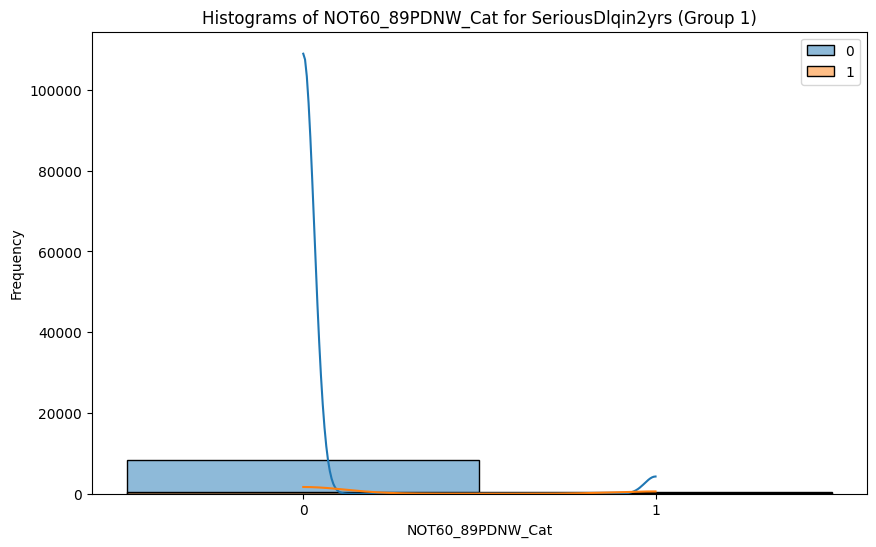

In [25]:


# Vamos a ver la relación con el target de las variables numéricas.

features = [col for col in train_set.columns if col != target]
for col in features:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)


In [26]:
# No hacemos caso de las tres úlimas gráficas porque son las categóricas.
# NO podemos concluir gran cosa por los rangos y diferentes distribuciones. Todas las "NumberOfTime" parecen interesantes (esa superposición naranaja sobre la azul en la larga cola) pero no son claras, y el resto salvo Age tampoco parece aportar mucho.
# Veamos las "NumberOfTime" separando las gráficas en vez de superponiéndolas*

c:\Users\igcor\OneDrive\Escritorio\BOOTCAMP\REPO BOOTCAMP\DS_Online_Mayo24_Exercises\04_Machine_Learning\Sprint_16\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


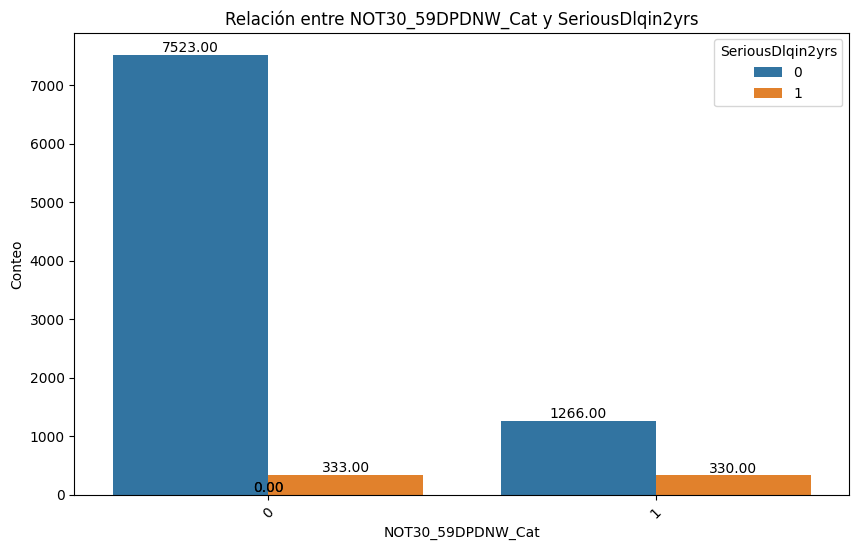

c:\Users\igcor\OneDrive\Escritorio\BOOTCAMP\REPO BOOTCAMP\DS_Online_Mayo24_Exercises\04_Machine_Learning\Sprint_16\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


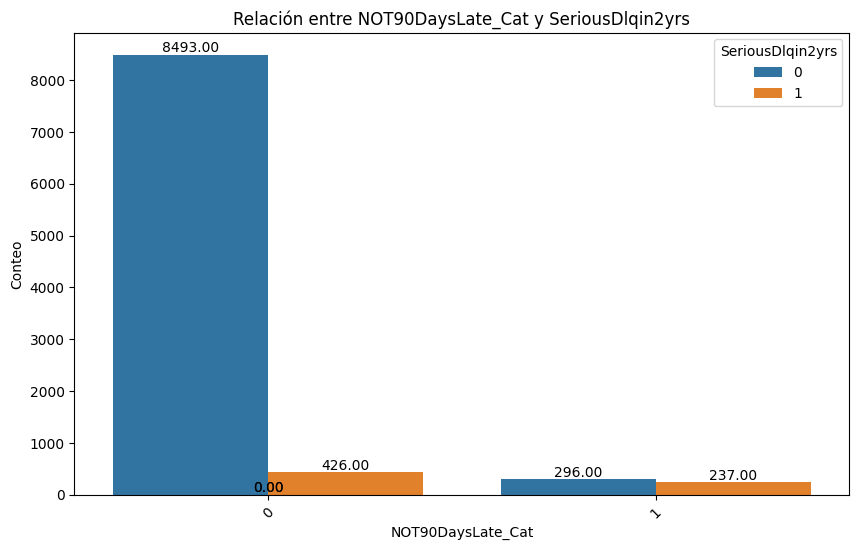

c:\Users\igcor\OneDrive\Escritorio\BOOTCAMP\REPO BOOTCAMP\DS_Online_Mayo24_Exercises\04_Machine_Learning\Sprint_16\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


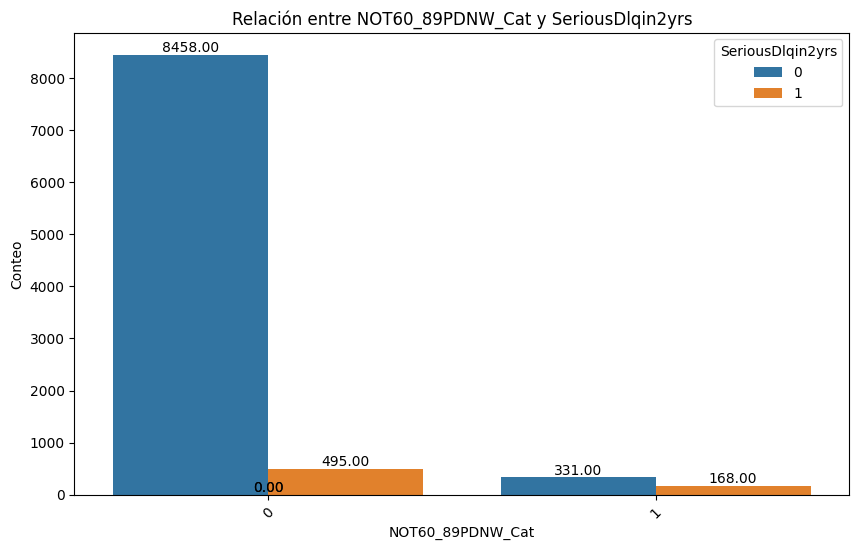

In [27]:
#vmos a ver las que hemos pasado a categoricas
categoricas = ['NOT30_59DPDNW_Cat','NOT90DaysLate_Cat','NOT60_89PDNW_Cat']


for col in categoricas:
    bt.plot_categorical_relationship_fin(train_set,col,target,show_values= True, relative_freq= False);

In [28]:
# Las tres variables categóricas parecen tener parecida distribución....puede que sean redundantes. Quizá la 30_59 algo diferente.

In [29]:
# Veamos ahora las correlaciones para las variables numéricas.

numericas = [col for col in train_set.columns if col not in categoricas]

numericas

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']

In [30]:
#Vamos a ver la correlación con el target de las variables numéricas.

corr= train_set[numericas].corr() #Correlación lineal, de Pearson.
serie_corr = np.abs(corr[target]) # Recordemos que el target aquí es SeriousDlqin2yrs.
serie_corr.sort_values(ascending = False)

SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.284084
age                                     0.107801
NumberOfDependents                      0.038829
NumberOfOpenCreditLinesAndLoans         0.032472
MonthlyIncome                           0.018163
DebtRatio                               0.001863
NumberRealEstateLoansOrLines            0.001677
Name: SeriousDlqin2yrs, dtype: float64

In [31]:
# Estableceremos un punto de corte (umbral) y nos quedaremos con las que superen ese punto de corte para luego compararlas en un heatmap:
r_minimo = 0.03  # Umbral de correlación para establacer las features que más nos importan.
features_num_sel = serie_corr[serie_corr >= r_minimo].index.to_list() # Las filtramos por ese umbral.
len(features_num_sel)
features_num_sel

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfDependents']

Sobre las que nos quedamos como prioritarias, vamos a hacer dos niveles de prioridad sobre estas que nos quedamos:
- Primero hacemos un heatmap para analizar unas con otras para ver si hay una potencial colinearidad.
- Si vemos que hay colinearidad las pasamos a un segundo nivel dentro de estas prioritarias.

<Axes: >

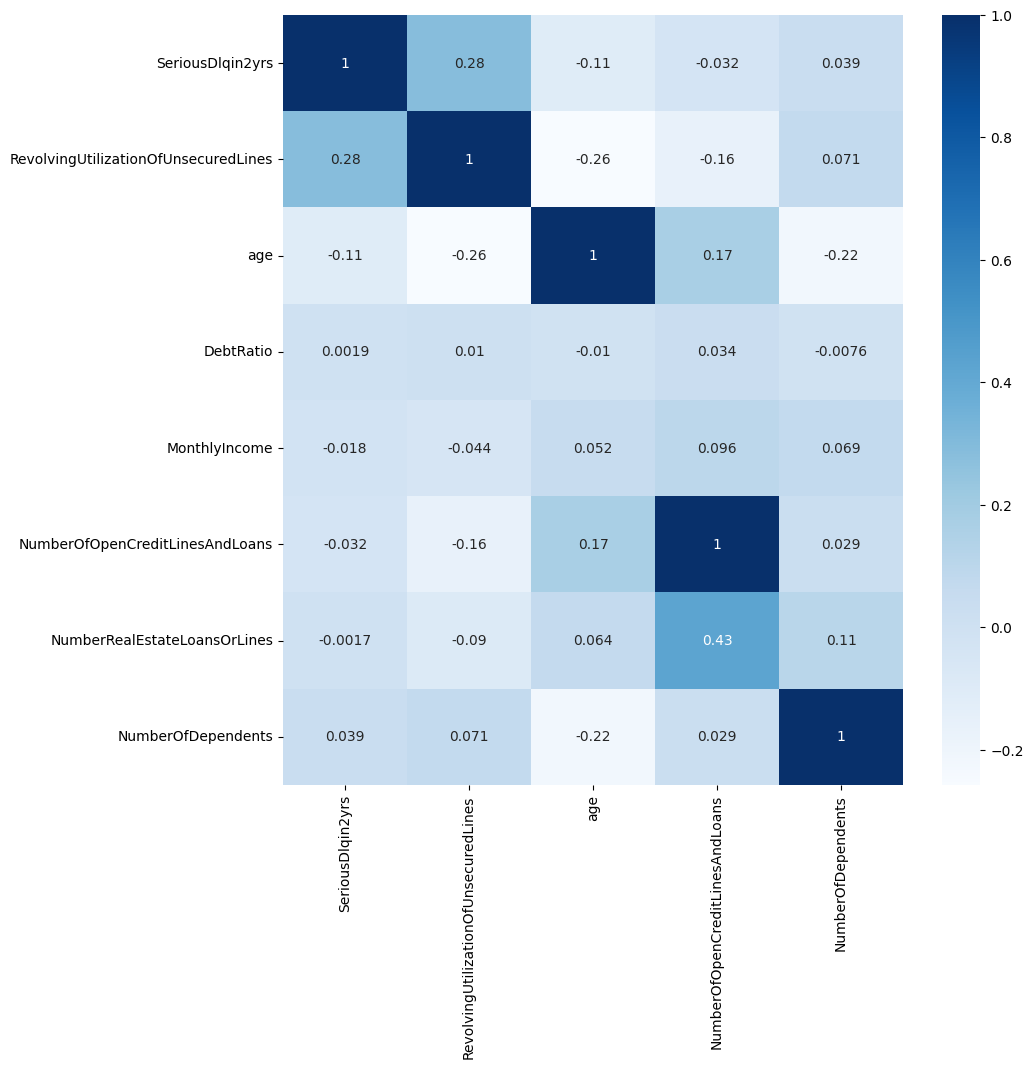

In [32]:

import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(corr[features_num_sel], annot= True, cmap= "Blues")

In [33]:
# No vemos colinearidad de las seleccionadas, por lo que no vamos a considerar un segundo grupo de prioridad.


2.2 Selección de numéricas con SelectKBest y ANOVA. Categóricas mediante Mutual Information

In [52]:
# Veamos las numéricas.
numericas

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']

In [53]:
numericas.remove('SeriousDlqin2yrs')
numericas

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']

In [75]:
X_train = train_set[numericas]
y_train = train_set["SeriousDlqin2yrs"]
selector = SelectKBest(f_classif, k=4)
x_data_kbest = selector.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out()) # Devuelve array de numpy, por eso construimos df con los datos de ese array más 
# las columnas elegidas qeu se obtienen de su selector con el método "get_featues_names_out()"
X_train_kbest

# Solo están esas k featues con lo p-values más bajos.Ha elegido las columnas seleccionadas contra la clase que dan las pvalues más bajos.

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfOpenCreditLinesAndLoans,NumberOfDependents
0,0.391240,68.0,13.0,0.0
1,0.906540,59.0,7.0,1.0
2,0.933223,52.0,3.0,3.0
3,0.857859,50.0,9.0,0.0
4,0.000000,61.0,5.0,1.0
...,...,...,...,...
9447,0.397822,53.0,14.0,0.0
9448,0.015171,76.0,4.0,0.0
9449,0.988201,62.0,4.0,0.0
9450,0.122072,41.0,9.0,1.0


In [37]:
# El KBest parametrizado para 3 features elige: RevolvingUtilization, age y NumberOfDependents

In [38]:
# Veamos las categóricas mediante el MUTUAL INFORMATION.

for col in categoricas: # Recorro todas las features categóricas calculando el coefeiciente de información mutua con la target y lo imprimo.
    print(f"MI({col};{target}):", mutual_info_score(train_set[col],train_set[target]))

MI(NOT30_59DPDNW_Cat;SeriousDlqin2yrs): 0.022123038340812945
MI(NOT90DaysLate_Cat;SeriousDlqin2yrs): 0.03421467132247159
MI(NOT60_89PDNW_Cat;SeriousDlqin2yrs): 0.017771329855032478


In [39]:
# Parece que las tres categóricas comparten muy poca información con la variable target.


2.3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)

In [56]:
# Vamos a usar un RandomForest

rf_selector = RandomForestClassifier(random_state= 42)


In [57]:
# Lo entrenamos.
rf_selector.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [58]:
# Vamos a sacar la feature importance con criterio selección que tengán más que la media.
rf_selector.feature_importances_[rf_selector.feature_importances_ > rf_selector.feature_importances_.mean()]

array([0.26180161, 0.14813658, 0.19014591, 0.19160398])

In [43]:
from sklearn.feature_selection import SelectFromModel

In [59]:
selector_model = SelectFromModel(estimator = rf_selector, threshold= "median") # le decimos cual queremos que sea el estimador (randomforest) 
# y el nivle para seleccionar (en este caso decidimos la mediana.)
# El modelo debe tener un atributo feature_importances_ o un atributo coef_ si no no lo podemos usar.
# HASTA AHORA SOLO LO HEMOS INSTANCIADO


In [60]:
#LO IENTRENAMOS.
selector_model.fit(X_train,y_train) 

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [61]:
# VEMOS CUALES HA SELECCIONADO.
selector_model.get_feature_names_out()

array(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome'], dtype=object)

In [62]:
# Con las **features** anteriores con forma de array numpy creamos un df, el dataset con las features seleccionadas por el randomforest.
X_train_model = pd.DataFrame(selector_model.transform(X_train), columns = selector_model.get_feature_names_out())
X_train_model

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome
0,0.391240,68.0,2.693124,2166.0
1,0.906540,59.0,0.325227,6496.0
2,0.933223,52.0,0.372442,8258.0
3,0.857859,50.0,0.511098,5225.0
4,0.000000,61.0,0.414167,5166.0
...,...,...,...,...
9447,0.397822,53.0,0.332584,11560.0
9448,0.015171,76.0,0.005427,3500.0
9449,0.988201,62.0,0.450432,8442.0
9450,0.122072,41.0,0.638133,3749.0


2.4. Selección de las mejores features empleando RFE.

In [63]:
# Vamos a elegir un modelo y un número de features y el RFE irá eliminando las menos sigficativas.

In [64]:
X_train_rfe = train_set[numericas] # las numéricas 
y_train_rfe = train_set["SeriousDlqin2yrs"]# la target.

# X_train_rfe = df_wines[features_num].copy()de wines
# y_train_red = df_wines["class"] 

In [69]:
rf_RFE = RandomForestClassifier(random_state= 42)  #el que queramos mientras tenga feature importance o coef.
# Puedes usar tu modelo, o modelos a probar o un modelo "proxy" como en la selección por modelo

rfe = RFE(estimator = rf_RFE, # los intanciamos/inicializamos.
          n_features_to_select= 4, # Iterará hasta quedarse con 3
          step = 1) # Elimina de una en una, pero es configurable

rfe.fit(X_train_rfe, y_train_rfe)
print(rfe.ranking_) #hará un ranking de las que se quedd (si le he dicho que quiero 5 les pondrá a todas 1, al resto ya por orden.)
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = numericas).sort_values("ranking")

[1 1 1 1 2 4 3]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
DebtRatio,1
MonthlyIncome,1
NumberOfOpenCreditLinesAndLoans,2
NumberOfDependents,3
NumberRealEstateLoansOrLines,4


In [ ]:
# Parece que todos van seleccionando las mismas features...

    2.5. Selección de las mejores features empleando SFS.

In [ ]:
# Empezaremos con una feature e iremos añadiendo hasta llegar a un número predefinido

In [70]:
rf_SFS = RandomForestClassifier(random_state = 42) # Lo instanciamos con RandonForestClassifier


sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 4, # aquí para al llegar a 4 featues.
                                        cv = 4,
                                        scoring = "balanced_accuracy") # seleccionamos el scoring.


sfs_forward.fit(X_train, y_train) # lo entrenamos.

# también tiene un .transform que si le paso el X_train nos devolerá el dataset ya transformado solo con las columnas elegids.

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=4, scoring='balanced_accuracy')

In [71]:
print("Elegidasd SFS:", sfs_forward.get_feature_names_out()) # Nos da las columnas elegidas.

Elegidasd SFS: ['RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfOpenCreditLinesAndLoans' 'NumberRealEstateLoansOrLines']


In [72]:
# Parece que coincide en casi todas las features...

    2.6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

# Veamos las features seleccionadas:

SFS: 'RevolvingUtilizationOfUnsecuredLines' 'age' 'NumberOfOpenCreditLinesAndLoans' 'NumberRealEstateLoansOrLines'
RFE: 1: (RevolvingUtilizationOfUnsecuredLineS' 'age' 'DebtRatio' 'MonthlyIncome') Luego vendrían: 'NumberOfOpenCreditLinesAndLoanS' 'NumberOfDependents''NumberRealEstateLoansOrLines'
SFM: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio','MonthlyIncome']
SKBEST-ANOVA: RevolvingUtilizationOfUnsecuredLines	age	NumberOfOpenCreditLinesAndLoans	NumberOfDependent
Visual_Val_Correlac:'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfDependents'

In [76]:
# Seleccionaríamos las seiguientes
features_HV=['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfOpenCreditLinesAndLoans','DebtRatio','MonthlyIncome']

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.